In [1]:

# Standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_selector ,  make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('/Users/faris/Downloads/untitled folder/Metabolic  Syndrome.csv')

# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


In [4]:
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


## Dropping 'seqn' column

In [5]:
# We will drop the seqn column which is irrelvant.
df = df.drop(columns='seqn')
df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


## Checking for duplicate rows

In [6]:
# We will check for duplicate rows and delete them.
dup = df.duplicated().sum()
print(f'There are {dup} duplicate rows.')

There are 0 duplicate rows.


# Feature Engineering

## Creating a Triglycerides/HDL ratio column

In [7]:
# We will create a new column that divides Triglycerides by HDL and create a Tryglyceride-HDL ratio that cardiologists use.
df['Tryglyceride-HDL ratio'] = df['Triglycerides']/df['HDL']


df = df.drop(columns = ['Triglycerides','HDL'])

## Creating a Diabetic column with fasting blood glucose level greater than 120 (According to American Diabetes Association)

In [8]:
df['Diabetic'] = df['BloodGlucose'].apply(lambda x: 'Diabetic' if x > 120 else 'Non-Diabetic')



## Using a for loop to check for inconsistenies

In [9]:
# # checking for inconsistencies in the data 
datatypes = df.dtypes
stringcols = datatypes[datatypes=='object'].index
stringcols

# using for loop to check for inconsistencies 
for i in stringcols:
  print(f'--Column = {i}')
  print(df[i].value_counts(dropna=False))
  print('\n\n')

--Column = Sex
Female    1211
Male      1190
Name: Sex, dtype: int64



--Column = Marital
Married      1192
Single        498
Divorced      242
NaN           208
Widowed       166
Separated      95
Name: Marital, dtype: int64



--Column = Race
White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: Race, dtype: int64



--Column = MetabolicSyndrome
No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64



--Column = Diabetic
Non-Diabetic    2041
Diabetic         360
Name: Diabetic, dtype: int64





## Changing Sex column name to Is_Male and binary encoding it

In [10]:
df.rename(columns={'Sex':'Is_Male'}, inplace=True)
df['Is_Male'].replace({'Male':1,'Female':0}, inplace=True)
df['Is_Male'].value_counts()

0    1211
1    1190
Name: Is_Male, dtype: int64

In [11]:
df.isna().sum()

Age                         0
Is_Male                     0
Marital                   208
Income                    117
Race                        0
WaistCirc                  85
BMI                        26
Albuminuria                 0
UrAlbCr                     0
UricAcid                    0
BloodGlucose                0
MetabolicSyndrome           0
Tryglyceride-HDL ratio      0
Diabetic                    0
dtype: int64

# Visualisation

## Handling the columns

In [12]:
cat_attributes = df.select_dtypes(include=['object'])
num_attributes = df.select_dtypes(include=['number'])

## Visualizing the numeric features

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Is_Male'}>,
        <AxesSubplot: title={'center': 'Income'}>],
       [<AxesSubplot: title={'center': 'WaistCirc'}>,
        <AxesSubplot: title={'center': 'BMI'}>,
        <AxesSubplot: title={'center': 'Albuminuria'}>],
       [<AxesSubplot: title={'center': 'UrAlbCr'}>,
        <AxesSubplot: title={'center': 'UricAcid'}>,
        <AxesSubplot: title={'center': 'BloodGlucose'}>],
       [<AxesSubplot: title={'center': 'Tryglyceride-HDL ratio'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

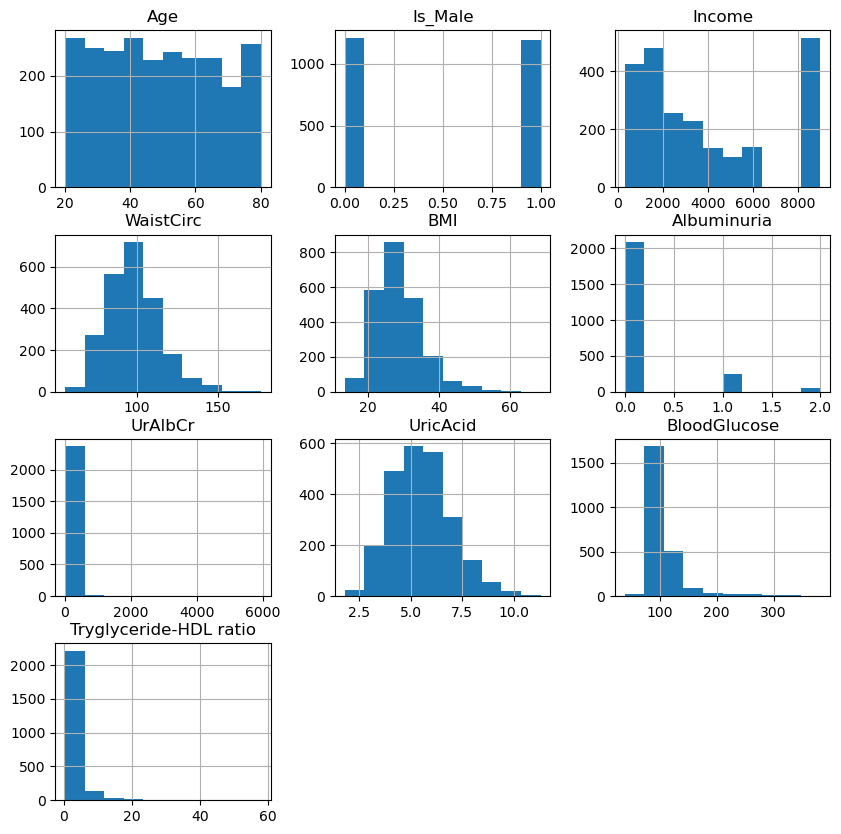

In [13]:
num_attributes.hist(figsize=(10,10))

<AxesSubplot: xlabel='count', ylabel='Race'>

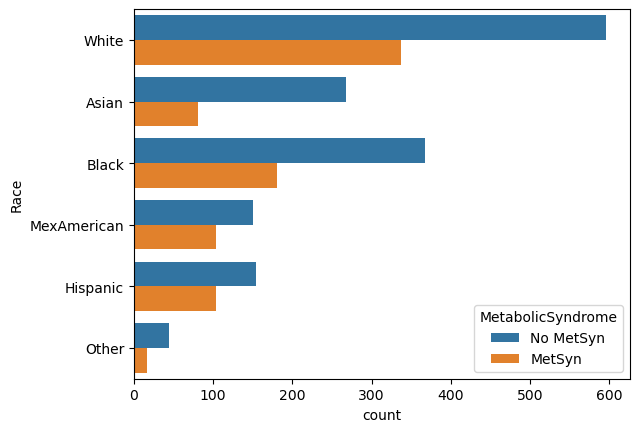

In [14]:
sns.countplot(y='Race', hue='MetabolicSyndrome', data = cat_attributes)

We can see from the count plot above that the proportion of  Metabolic Syndrome relative to not having it is higher among the Mexican American and Hispanic communities and the lowest among the Asian communities.

## Scatter plot of BMI vs Waist Circumference and MetabolycSyndrome

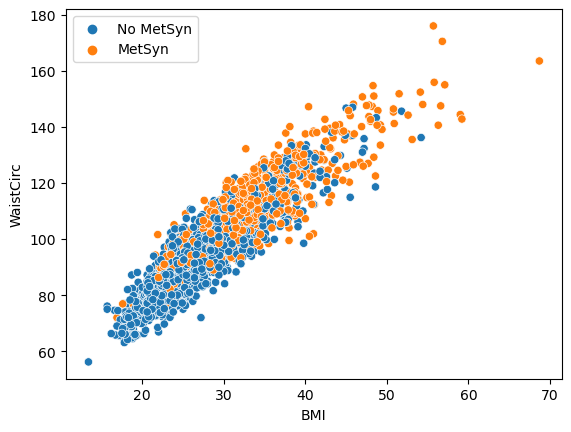

In [15]:

sns.scatterplot(data = df, x = 'BMI', y = 'WaistCirc', hue = 'MetabolicSyndrome')
plt.legend();



##We can see from the scatter plot above that there is a positive relationship between patients who have metabolyc Syndrome and high BMI and Waist circumference.

## Scatter plot of BMI vs Triglycerides-HDL ratio and MetabolycSyndrome

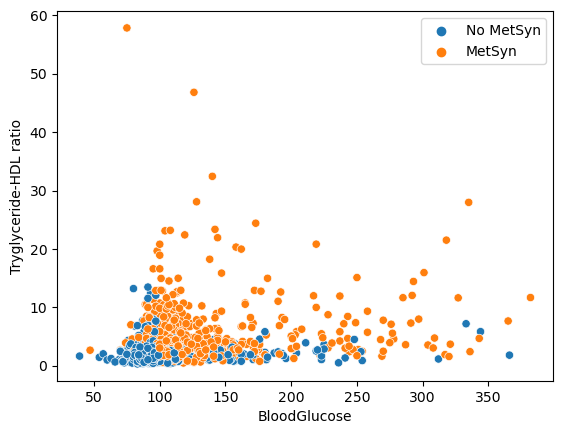

In [16]:

sns.scatterplot(data = df, x = 'BloodGlucose', y = 'Tryglyceride-HDL ratio', hue = 'MetabolicSyndrome')
plt.legend();

We can see from the scatter plot above that there is a positive relationship between patients who have metabolyc syndrome  and high bloodglucose tended to have heart conditions by having higher Triglyceride-HDL ratios.  Idealy a ratio of 2 or lower is healthy.

#  Preprocessing data appropriately for modeling 

## Binary encoding the target feature

In [17]:
df['MetabolicSyndrome'].replace({'No MetSyn':0, 'MetSyn':1}, inplace=True)
df['MetabolicSyndrome'].value_counts()

0    1579
1     822
Name: MetabolicSyndrome, dtype: int64

## Setting up target and features

In [18]:
# Setting X and y
X = df.drop(columns = 'MetabolicSyndrome')
y = df['MetabolicSyndrome']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

## Checking for missing values

In [19]:
# Checking for missing values
print(df.isna().sum())

Age                         0
Is_Male                     0
Marital                   208
Income                    117
Race                        0
WaistCirc                  85
BMI                        26
Albuminuria                 0
UrAlbCr                     0
UricAcid                    0
BloodGlucose                0
MetabolicSyndrome           0
Tryglyceride-HDL ratio      0
Diabetic                    0
dtype: int64


There are missing values in Marital, Income, WaistCirc and BMI columns.  For Marital we will impute the most frequent value and for the remaining numeric columns we will impute the mean value.

In [20]:
# Initiating transformers

# Imputers
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

# One hot encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Scaler
scaler = StandardScaler()


In [21]:
# Column selectors
nmr_selector = make_column_selector(dtype_include ='number')
ctg_selector = make_column_selector(dtype_include='object')

ctg_clmns = ctg_selector(X_train)
nmr_clmns = nmr_selector(X_train)


In [22]:
# Making pipelines
nmr_pipe = make_pipeline(mean_imputer, scaler)
ctg_pipe = make_pipeline(most_frequent_imputer, ohe)

In [23]:
# Initiating column transformer
nmr_tuple = (nmr_pipe, nmr_selector)
ctg_tuple = (ctg_pipe, ctg_selector)

pre_processor = make_column_transformer(nmr_tuple, ctg_tuple, remainder='passthrough')
pre_processor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x16078fe50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x16078f970>)])

In [24]:
# Fitting preprocessed train data
pre_processor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x16078fe50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x16078f970>)])

In [25]:
# Saving processed train and test data
X_train_processed = pre_processor.transform(X_train)
X_test_processed = pre_processor.transform(X_test)

In [26]:
# Inspecting result
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of train data is', X_train_processed.shape)
print('shape of test data is', X_test_processed.shape)
print('\n')

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of train data is (1800, 23)
shape of test data is (601, 23)




# Modeling

## PCA 

/var/folders/15/t06gywxj5nj9956_98qpphjc0000gn/T/ipykernel_45983/1964925927.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


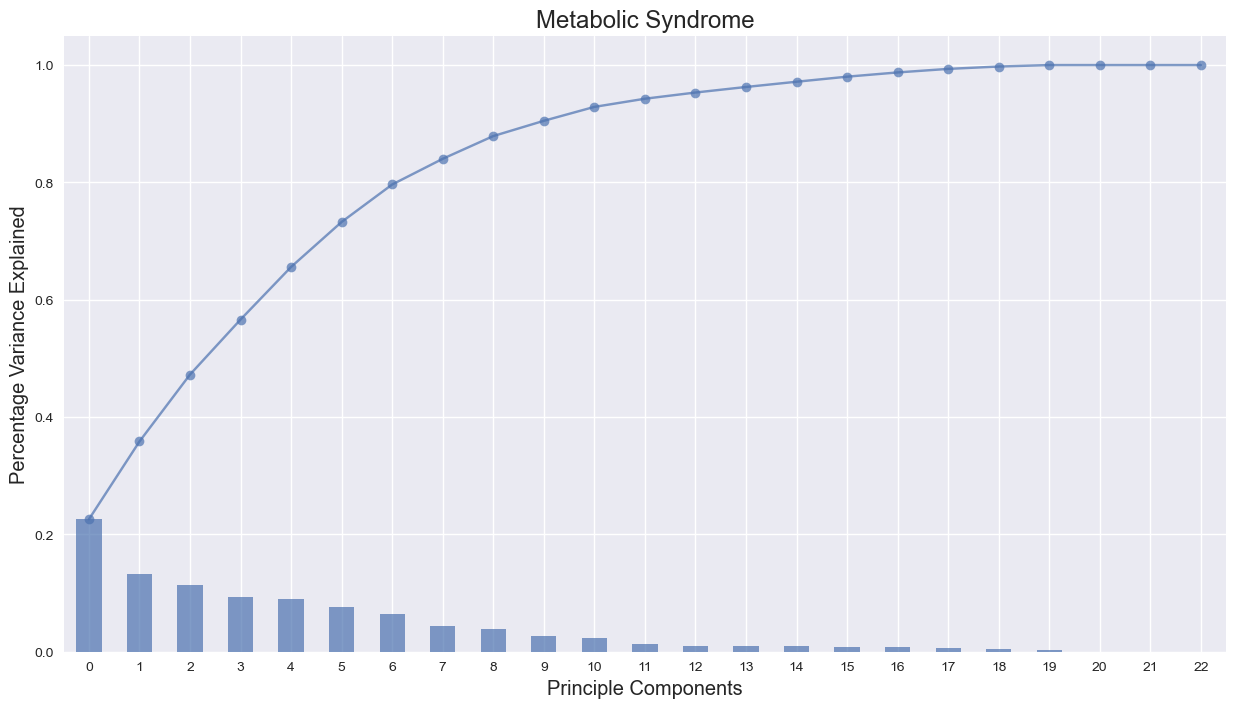

In [27]:
# Instantiate & fit data using PCA


pca = PCA() 

pca.fit(X_train_processed)

# Lets visual the cummulative sum of the variances 

plt.style.use("seaborn")
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_)

# Plot the variance for each component
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)
    
# Plot line chart of increasing variances
pd.Series(var_ls).plot(marker="o", alpha=0.7) 

# Plot labels and titles
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Metabolic Syndrome", fontsize="xx-large")
plt.show();

In [28]:
# PCA Preprocessing 
pca = PCA(n_components=16)


# Creating a transformer pipeline
transformer = make_pipeline(scaler, pca)

## Random forest model

In [29]:
# Default Random Forest Model
# Initiating the model
rf = RandomForestClassifier()
rf2 = RandomForestClassifier()

# Making the Pipeline
rf_pipe = make_pipeline(scaler, rf)
rf_pipe_pca = make_pipeline(transformer,rf2)

# Fitting on Train Data
rf_pipe.fit(X_train_processed, y_train)
rf_pipe_pca.fit(X_train_processed, y_train)

# Saving the Predictions (NO PCA)
rf_train_pred = rf_pipe.predict(X_train_processed)
rf_test_pred = rf_pipe.predict(X_test_processed)

# Saving the Predictions (With PCA)
rfPCA_train_pred = rf_pipe_pca.predict(X_train_processed)
rfPCA_test_pred = rf_pipe_pca.predict(X_test_processed)

Train Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1182
           1       1.00      1.00      1.00       618

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

Test Classification Report 

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       397
           1       0.83      0.74      0.78       204

    accuracy                           0.86       601
   macro avg       0.85      0.83      0.84       601
weighted avg       0.86      0.86      0.86       601



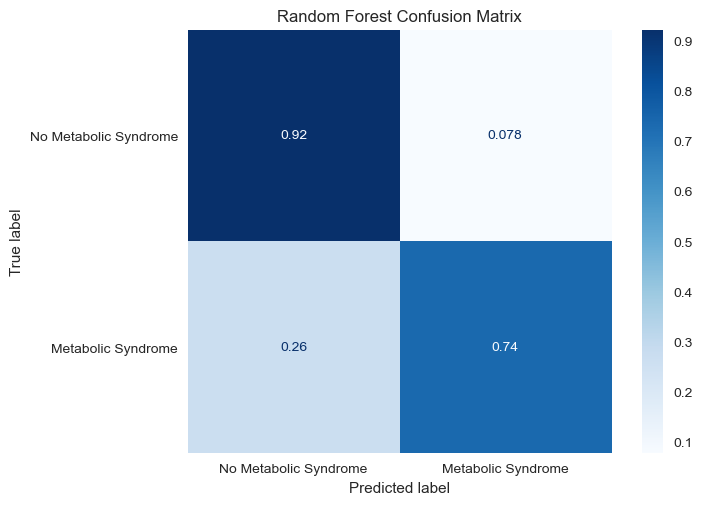

In [59]:
# Confusion Matrix

labels = ['No Metabolic Syndrome', 'Metabolic Syndrome']
ConfusionMatrixDisplay.from_predictions(y_test, rf_test_pred, display_labels=labels , cmap='Blues',normalize='true').ax_.set_title('Random Forest Confusion Matrix',sns.set_style("whitegrid", {'axes.grid' : False}))


# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, rf_train_pred))
print('Test Classification Report', '\n')
print(classification_report(y_test, rf_test_pred))



Train Classification Report PCA 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1182
           1       1.00      1.00      1.00       618

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

Test Classification Report PCA 

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       397
           1       0.73      0.69      0.71       204

    accuracy                           0.81       601
   macro avg       0.79      0.78      0.79       601
weighted avg       0.81      0.81      0.81       601



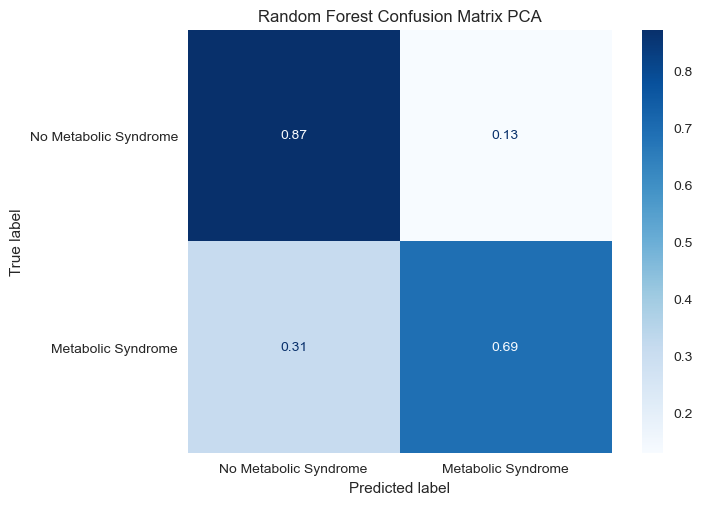

In [60]:

ConfusionMatrixDisplay.from_predictions(y_test, rfPCA_test_pred, display_labels=labels , cmap='Blues',normalize='true').ax_.set_title('Random Forest Confusion Matrix PCA', sns.set_style("whitegrid", {'axes.grid' : False}))


# Classification Report for PCA
print('Train Classification Report PCA', '\n')
print(classification_report(y_train, rfPCA_train_pred))
print('Test Classification Report PCA', '\n')
print(classification_report(y_test, rfPCA_test_pred))

The accuracy for the PCA test is lower than the test accuracy without PCA.  We will continue with the NON PCA model.

### Tuning Random Forest Model with gridsearch 

In [32]:
# Finding parameters
rf_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestclassifier', RandomForestClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestclassifier': RandomForestClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': None,
 

In [33]:
# Setting up Parameter Grid
param_grid = {'randomforestclassifier__max_depth': range(2,20),
              'randomforestclassifier__n_estimators': range(5,60)}

In [34]:
# Making instance of gridsearch
rf_gridsearch = GridSearchCV(rf_pipe, param_grid)

# Fitting on Train data
rf_gridsearch.fit(X_train_processed, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': range(2, 20),
                         'randomforestclassifier__n_estimators': range(5, 60)})

In [35]:
print('Best Random Forest Parameters:')
print(rf_gridsearch.best_params_)
best_pipe = rf_gridsearch.best_estimator_
print(f'Accuracy of the Best Random Forest Model: {best_pipe.score(X_test_processed, y_test).round(5)}')

Best Random Forest Parameters:
{'randomforestclassifier__max_depth': 13, 'randomforestclassifier__n_estimators': 50}
Accuracy of the Best Random Forest Model: 0.84859


In [36]:
# Tuned Random Forest Model

# Instance of model using max depth of 12 and n_estimators of 38
rftuned = RandomForestClassifier(max_depth=12, n_estimators=38)

# Making tuned Pipeline
rftuned_pipe = make_pipeline(scaler, rftuned)

# Fitting on Train data
rftuned_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=12, n_estimators=38))])

In [37]:
# Saving Predictions
rftuned_trainpred = rftuned_pipe.predict(X_train_processed)
rftuned_testpred = rftuned_pipe.predict(X_test_processed)

Train Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1182
           1       1.00      1.00      1.00       618

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

Test Classification Report 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       397
           1       0.83      0.75      0.79       204

    accuracy                           0.86       601
   macro avg       0.85      0.84      0.84       601
weighted avg       0.86      0.86      0.86       601



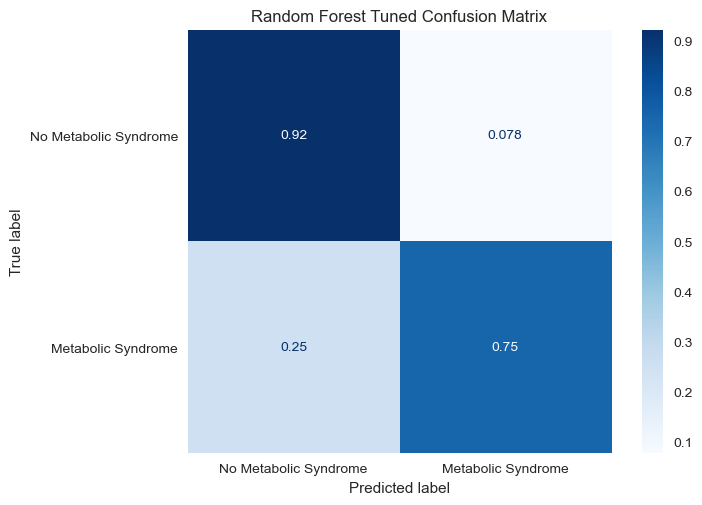

In [61]:
# Tuned Random Forest Model Metrics
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rftuned_testpred, display_labels=labels, cmap='Blues', normalize='true').ax_.set_title('Random Forest Tuned Confusion Matrix',sns.set_style("whitegrid", {'axes.grid' : False}))

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, rftuned_trainpred))
print('Test Classification Report', '\n')
print(classification_report(y_test, rftuned_testpred))

After tuning the random forest model using gidsearch, the accuracy increased to 87%.  Thus, we will select the tuned random forest model.

## KNN modeling

In [39]:
# Initiating model
knn = KNeighborsClassifier()


# Making Knn Pipeline
knn_pipe = make_pipeline(scaler, knn)

# Fitting on Train data
knn_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [40]:
# Saving Predictions
knn_train_pred = knn_pipe.predict(X_train_processed)
knn_test_pred = knn_pipe.predict(X_test_processed)

Train Classification Report 

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1182
           1       0.83      0.69      0.75       618

    accuracy                           0.84      1800
   macro avg       0.84      0.81      0.82      1800
weighted avg       0.84      0.84      0.84      1800

Test Classification Report 

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       397
           1       0.68      0.53      0.60       204

    accuracy                           0.76       601
   macro avg       0.73      0.70      0.71       601
weighted avg       0.75      0.76      0.75       601



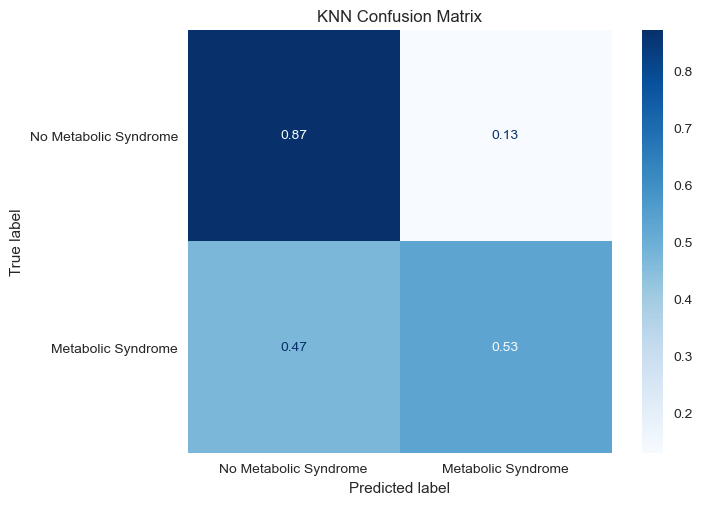

In [62]:
# KNN Model Metrics

# Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_pred,display_labels=labels, cmap='Blues', normalize='true').ax_.set_title('KNN Confusion Matrix',sns.set_style("whitegrid", {'axes.grid' : False}))

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, knn_train_pred))
print('Test Classification Report', '\n')
print(classification_report(y_test, knn_test_pred))

### We will use gridsearch to see if we can obtain a higher accuracy

In [42]:
# Tuning KNN Model with GridSearchCV

# Checking Parameters
knn_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [43]:
# Setting up Parameter Grid
param_grid = {'kneighborsclassifier__n_neighbors': range(1,11),
              'kneighborsclassifier__weights': ['uniform', 'distance']}

In [44]:
# Gridsearch
knn_gridscv = GridSearchCV(knn_pipe, param_grid)

# Fitting on Train data
knn_gridscv.fit(X_train_processed, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 11),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [45]:
print('Best KNN Parameters:')
print(knn_gridscv.best_params_)
best_pipe = knn_gridscv.best_estimator_
print(f'Accuracy of the Best KNN Model: {best_pipe.score(X_test_processed, y_test).round(5)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 6, 'kneighborsclassifier__weights': 'distance'}
Accuracy of the Best KNN Model: 0.76539


In [46]:
# Tuned KNN model

# Instance of model using best KNN parameters
knntuned = KNeighborsClassifier(n_neighbors = 6, weights='distance' )


# Making Knn Pipeline
knntuned_pipe = make_pipeline(scaler, knn)

# Fitting on Train data
knntuned_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [47]:
# Saving Predictions
knntuned_trainpred = knntuned_pipe.predict(X_train_processed)
knntuned_testpred = knntuned_pipe.predict(X_test_processed)

Train Classification Report 

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1182
           1       0.83      0.69      0.75       618

    accuracy                           0.84      1800
   macro avg       0.84      0.81      0.82      1800
weighted avg       0.84      0.84      0.84      1800

Test Classification Report 

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       397
           1       0.68      0.53      0.60       204

    accuracy                           0.76       601
   macro avg       0.73      0.70      0.71       601
weighted avg       0.75      0.76      0.75       601



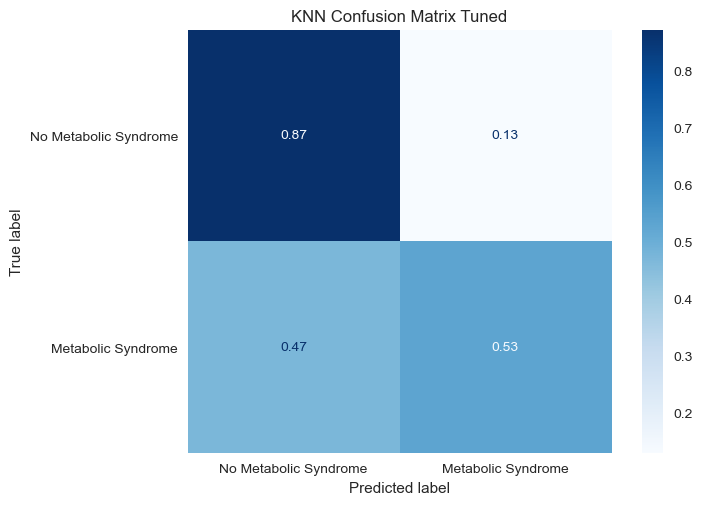

In [63]:
# KNN Model Metrics


# Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test, knntuned_testpred,display_labels=labels, cmap='Blues', normalize='true').ax_.set_title('KNN Confusion Matrix Tuned',sns.set_style("whitegrid", {'axes.grid' : False}))


# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, knn_train_pred))
print('Test Classification Report', '\n')
print(classification_report(y_test, knn_test_pred))

Both the Tuned and Untuned KNN models had the same accuracy of 76%.  



# Conclusion

Both the Tuned and Untuned KNN models had the same accuracy of 76%.  The tuned Random forest model had the highest accuracy at 86% while the type 1 & 2 errors almost stayed the same.  For diagnosing metabolic syndrome, its best to have the lowest type 2 error where you minimize the mistake of telling a patient they are healthy while they are actually ill.  The metrics for the best model chose will be below.

In [49]:
print('Test Classification Report', '\n')
print(classification_report(y_test, rftuned_testpred))

Test Classification Report 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       397
           1       0.83      0.75      0.79       204

    accuracy                           0.86       601
   macro avg       0.85      0.84      0.84       601
weighted avg       0.86      0.86      0.86       601



 Based on the 2 scatterplots below, we can correlate elevated waist circumference, BMI, tryglyceride-hdl ratio, and glucose levels to a patience having metabolic syndrome.  All these features are an indicator of obesity.  Below are 2 recommendations that are highly effective that medical professionals can consult with their patients.

*   Weight loss
*   Diet and lifestyle changes



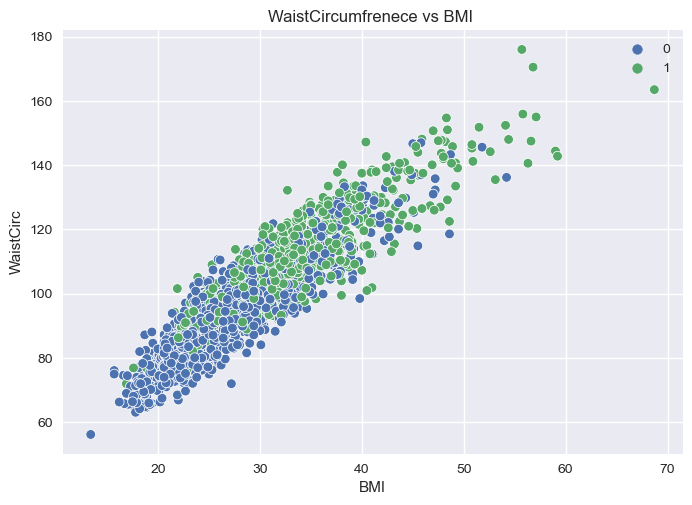

In [50]:
sns.scatterplot(data = df, x = 'BMI', y = 'WaistCirc', hue = 'MetabolicSyndrome').set_title('WaistCircumfrenece vs BMI ')
plt.legend();



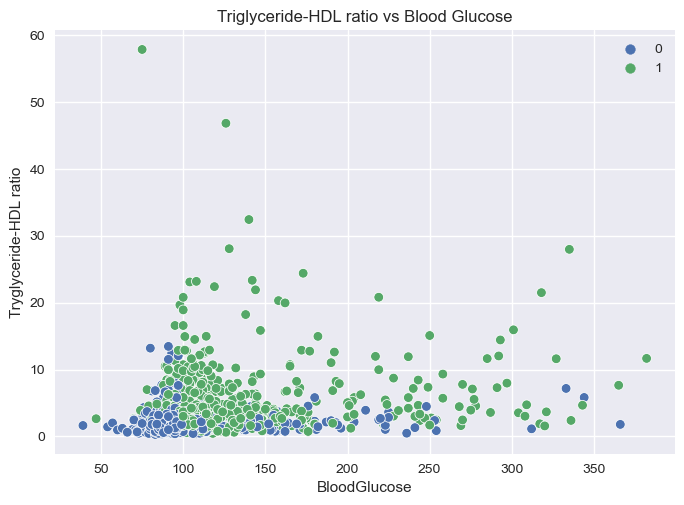

In [51]:
sns.scatterplot(data = df, x = 'BloodGlucose', y = 'Tryglyceride-HDL ratio', hue = 'MetabolicSyndrome').set_title('Triglyceride-HDL ratio vs Blood Glucose')
plt.legend();